# Zadanie 1

In [449]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/DANE LEKCJA 1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

In [451]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Zaporzyczyłem przydatne funkcje z notatek:

In [452]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [453]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [454]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [455]:
def plot_categorical_column(df, column_name):
    """
    Plots a bar chart for the specified categorical column.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """

    # count occurrences of each category
    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [456]:
def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

In [457]:
def scatterplot(df, column_name, y):
    """
    Plots a scatterplot between the chosen column and 'charges'.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against 'charges'.
    Returns:
        None. Displays the scatterplot.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y=y, color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs {y}')
    plt.xlabel(column_name)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [458]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [459]:
def categorical_and_fare(df, categorical_column):

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_column, y='Fare', palette='Set2')
    plt.title(f'Fare by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Fare')
    plt.tight_layout()
    plt.show()

In [460]:
def categorical_and_age(df, categorical_column):

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_column, y='Age', palette='Set2')
    plt.title(f'Age by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Age')
    plt.tight_layout()
    plt.show()

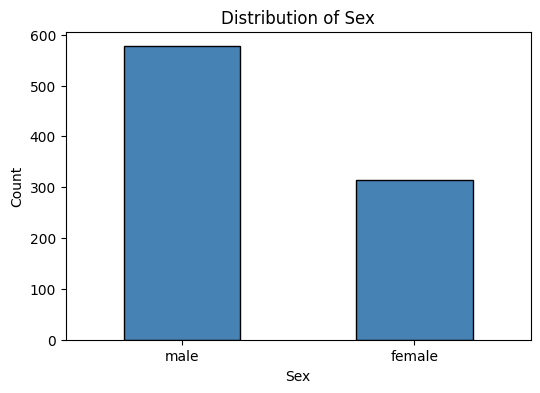

In [461]:
plot_categorical_column(titanic_df, 'Sex')

Na statku znajdowało się prawie dwa razy więcej mężczyzn niż kobiet.

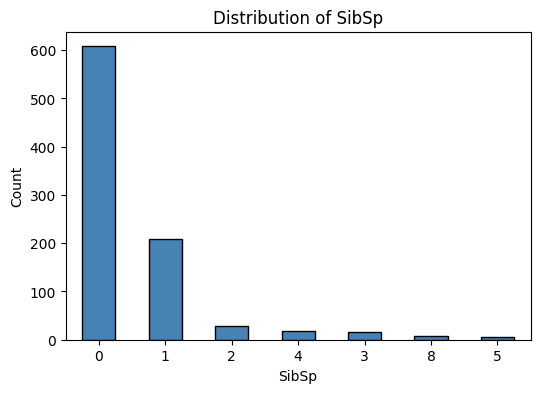

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [462]:
plot_categorical_column(titanic_df, 'SibSp')
titanic_df['SibSp'].value_counts()

Widzimy, że większość pasażerów podróżowała sama lub z niewielką ilością rodzeństwa/małżonkiem. Występują outlierzy, jednak rozkład większości wartości pokazuje, że nie są one błędne i mają logiczny sens: dla 5 osób SibSp to 5 (zakładając, że wszystcy są spokrewnieni: każdy z nich ma 4 rodzeństwa i małzónka). Wartość SibSp 8 może być podejrzana ponieważ zaznaczyło ją 7 osób, co w najlepszym wypadku oznaczałoby że są one dla siebie rodzeństwem tj. każda z nich ma 6 rodzeństwa i wtedy jeszcze 2 małżonków lub rodzeństwo od innych rodziców (?).

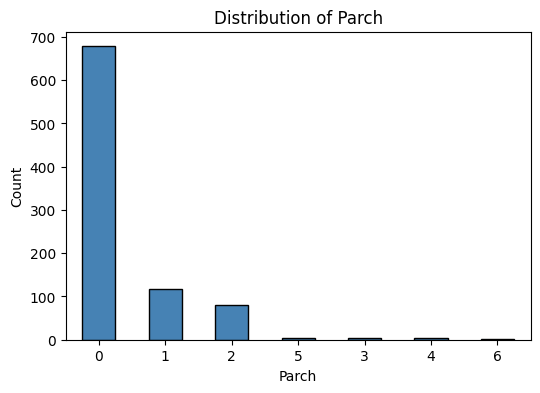

In [463]:
plot_categorical_column(titanic_df, 'Parch')

Większość z pasażerów nie miała na pokładzie dzieci. Są jakieś wartości odstające, ale raczej wiarygodne, nie da się tutaj zweryfikować jak wyżej.

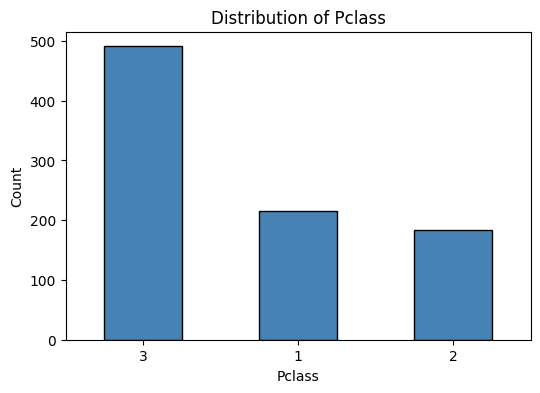

In [464]:
plot_categorical_column(titanic_df, 'Pclass')

Dość spodziewany rezultat: większość pasażerów w III klasie.

Sprawdzam w jakich kategoriach występują puste wartości:

In [465]:
missing_cols_mi = get_percentage_missing(titanic_df, axis=0)
missing_cols_mi

,0
Age,19.87
Fare,11.00
Cabin,77.10
Embarked,0.22


Aby nie zaburzać w sztuczny sposób rozkładu danych w kolumnach Cabin i Embarked, brakujące wartości uzupełniłem jako 'Unknown'.
W przypadku kolumn Age i Fare miałem większy dylemat: choć można zastąpić wartości NaN średnią, medianą lub wartościami zgodnymi z istniejącym rozkładem, takie podejście może prowadzić do zafałszowania wyników analizy. Na przykład, uzupełnienie wieku może sprawić, że pojawi się więcej młodych mężczyzn lub dzieci w III klasie niż było w rzeczywistości, co może wpłynąć na analizę zależności między płcią-wiekiem, klasą-wiekiem a przeżywalnością.
Z drugiej strony, usunięcie tych wierszy skutkuje utratą potencjalnie cennych informacji z pozostałych kolumn. Nie znalazłem idealnego rozwiązania, dlatego ostatecznie zdecydowałem się usupełnić Age zgodnie z istniejącym rozkładem, a Fare medianą dla danej klasy podróży (Pclass), ponieważ zależała ona od klasy (poniżej to sprawdziłem).

Nie wiem, czy słuszny dylema?

Zastępuje wartośći NaN w Cabin i Embarked wartościami 'Unknown':

In [466]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('Unknown')

Zapisuję do zmiennej age_count_prob rozkład wieku:

In [467]:
age_count_prob = get_column_distribution(titanic_df, 'Age')
age_count_prob

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


Uzupełniam wartośći NaN w columnie Age na podstawie istniejącego rozkładu:

In [468]:
age_values = age_count_prob.index
age_probs = age_count_prob.values
missing_age_vals = titanic_df.Age.isna()
titanic_df.loc[missing_age_vals, 'Age'] = np.random.choice(age_values, size=missing_age_vals.sum(), p=age_probs)

Sprawdzam jak zmienił się rozkład po uzupełnieniu:

In [469]:
get_column_distribution(titanic_df, 'Age')

,proportion
Age,
24.00,0.046016
30.00,0.037037
36.00,0.037037
21.00,0.035915
19.00,0.034792
...,...
80.00,0.001122
0.67,0.001122
0.42,0.001122


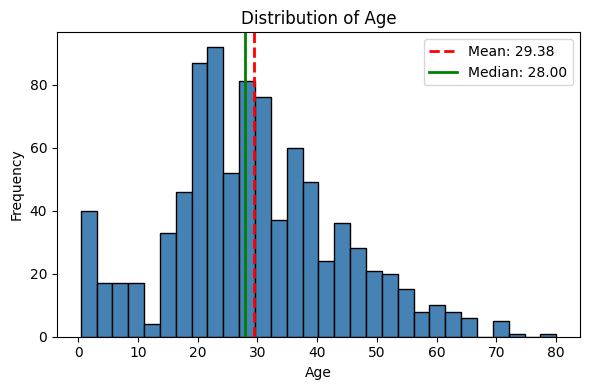

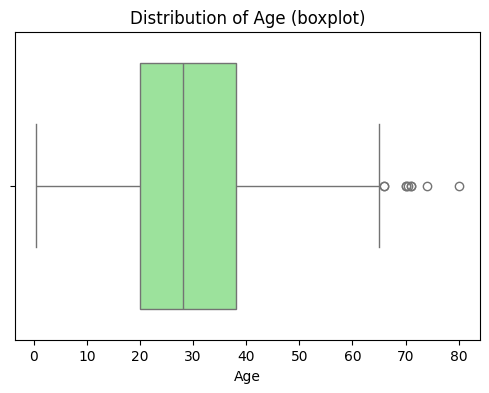

In [470]:
plot_numeric_histogram(titanic_df, 'Age')
boxplot(titanic_df, 'Age')

Age posiada rozkład delikatnie prawoskośny, prawie normalny. Widzimy że posiadamy wartości odstające, które jednak przyjmują sensowane wartości jeżeli chodzi o wiek pasażera.

Sprawdzam czy cena biletu powiązana jest z klasą podróży oraz jaki jest rozkład ceny biletu w poszczególnych klasach:

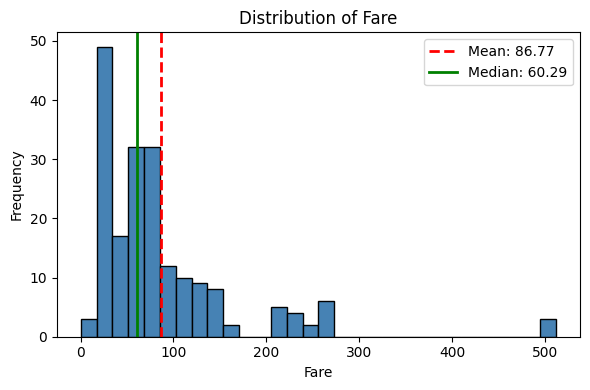

In [471]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 1], 'Fare')

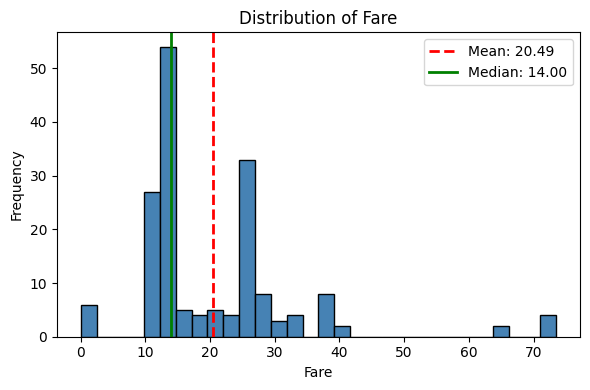

In [472]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 2], 'Fare')

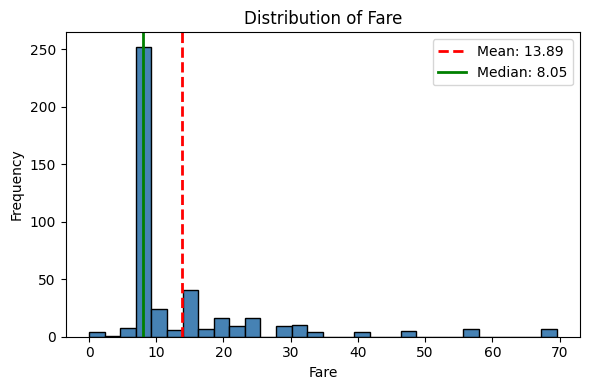

In [473]:
plot_numeric_histogram(titanic_df[titanic_df['Pclass'] == 3], 'Fare')

Ponieważ rozkłady te są asymetryczne wartości usupełnię medianą dla danej klasy. Ma to przewagę nad średnią, ponieważ potencjalnie eliminuje wpływ bardzo drogich ekskluzynych kabin (lub przeciwnie bardzo tanich) o możliwie ograniczonej liczbie. Ponieważ możnabyło się spodziewać jakieś zależności pomiędzy ceną biletu, a klasą rozdzieliłem to na klasy.

In [474]:
titanic_df.groupby('Pclass')['Fare'].median()

,Fare
Pclass,
1,60.2875
2,14.0000
3,8.0500


In [475]:
titanic_df['Fare'] = titanic_df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

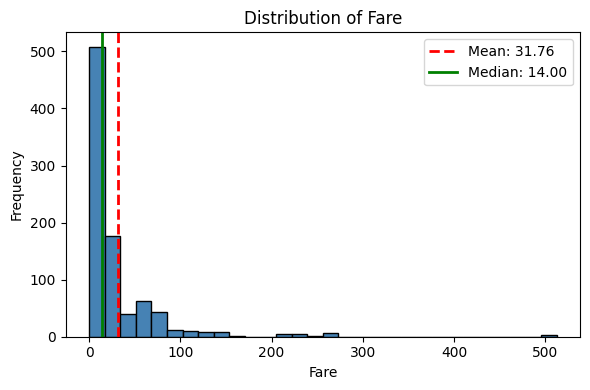

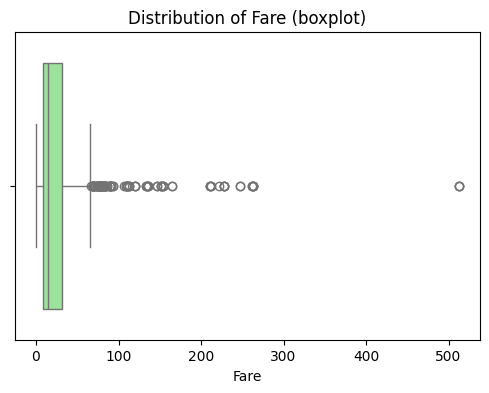

In [476]:
plot_numeric_histogram(titanic_df, 'Fare')
boxplot(titanic_df, 'Fare')

Fare posiada zdecydowanie rozkład prawoskośny, z bardzo dużym skupieniem wartości w okolicy średniej oraz długim ogonem na którym widzimy pojawiające się wartości cen biletów dla III klasy wyraźnie oddzielone od reszty. Outlierzy są zdecydowanie widoczni, momentami ekstremalni, jednak można przyjąć że cena biletu mogła wachać się w znaczny sposób w zależności od kabiny.

Uzywam dedykowanej funkcji convert_dtypes() do podania typów danych:

In [477]:
titanic_df = titanic_df.convert_dtypes()
titanic_df.dtypes

,0
Survived,Int64
Pclass,Int64
Name,string[python]
Sex,string[python]
Age,Float64
SibSp,Int64
Parch,Int64
Ticket,string[python]
Fare,Float64
Cabin,string[python]


Postanowiłem dodać dwie dodatkowe kolumny: Po pierwsze AgeGroup, które podzieli pasażerów na kategorie wiekowe. Po drugie Layer, które przypożądkuje warstwę pokładu ("piętro") na której znajdowała się kabina pasażera:

In [478]:
bins = [0, 18, 40, 60, titanic_df['Age'].max()+1]
labels = ['Child', 'YoungerAdult', 'OlderAdult', 'Senior']

AgeGroup = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)
titanic_df['AgeGroup'] = AgeGroup

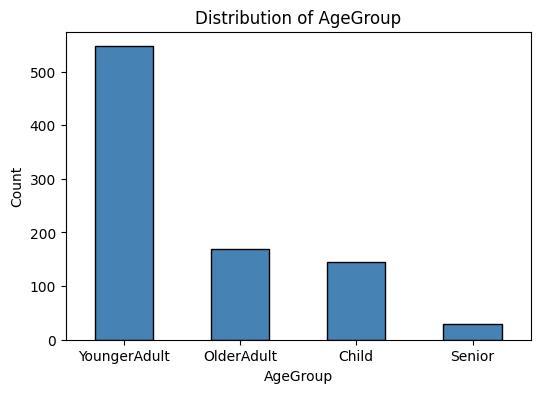

In [479]:
plot_categorical_column(titanic_df, 'AgeGroup')

In [480]:
print(titanic_df['Parch'].value_counts())
print(titanic_df['AgeGroup'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: Int64
AgeGroup
YoungerAdult    547
OlderAdult      170
Child           145
Senior           29
Name: count, dtype: int64


Liczba dzieci z rodzicami na pokładzie przekracza znacznie liczbę pasażerów w wieku 0-17 (AgeGrpup == 0), z czego wynika, że znaczna część osób pazażerów w wieku 18+ znajdowała się na pokładzie z rodzicami.

In [481]:
titanic_df['Layer'] = titanic_df['Cabin'].str[0]

unknown_layer_loc = titanic_df['Layer'] == 'U'
titanic_df.loc[unknown_layer_loc, 'Layer'] = np.nan

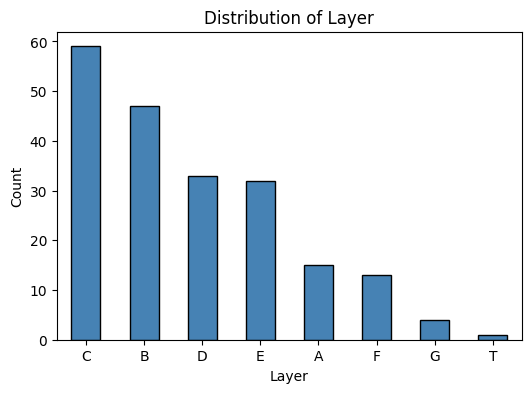

In [482]:
plot_categorical_column(titanic_df, 'Layer')

Widzimy, że większość pasażerów znajdowała się gdzieś po środku pokładu, z niewielką ilością pasażerów skrajnie wysoko bądź nisko.

Pora na kodowanie cech kategorialnych:


*   Name - kategoria nieistotna w kontekście zadania
*   Sex - kodowanie one-hot encoding (zmienna bez porządku)
*   Ticket - kategoria nieistotna w kontekście zadania
*   Cabin - kategoria nieistotna w kontekście zadania (została dodana nowa kategoria Layer pełniąca leprze zadanie w kontekście przewidywania przeżycia, ponieważ nie wiem gdzie konkretne kabiny się znajdowały poza poziomem na którym były)
*   Embarked - kodowanie one-hot encoding (zmienna bez porządku)
*   AgeGroup - kodowanie ordinal (istnieje porządek pomiędzy wartościami, ze względu na roznący wiek w poszczególnych kategoriach)
*   Layer - kodowanie ordinal (istnieje porządek pomiędzy wartościami, ze względu na ułożenie warstw w rozkładzie statku: T-najwyższa, potem od A do G od najwyżejszej do najniższej)

In [483]:
titanic_df = pd.get_dummies(data=titanic_df, prefix='Sex', columns=['Sex'], dtype=np.int32)

In [484]:
titanic_df = pd.get_dummies(data=titanic_df, prefix='Embarked', columns=['Embarked'], dtype=np.int32)
titanic_df = titanic_df.drop('Embarked_Unknown', axis=1)

In [485]:
mapping_agegroup = {
    'Child': 0,
    'YoungerAdult': 1,
    'OlderAdult': 2,
    'Senior' : 3
}

titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map(mapping_agegroup).astype('float64')

In [486]:
mapping_layer = {
    'T': 7,
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0,
}

titanic_df['Layer'] = titanic_df['Layer'].map(mapping_layer)

Wygenerowałem sobie wartości NaN w nowej kategorii, więc muszę się ich pozbyć. Wybrałem uzupełnianie według isteniejącego rozkładu.

Zapisuję do zmiennej layer_count_prob rozkład poziomu na pokładzie:

In [487]:
layer_count_prob = get_column_distribution(titanic_df, 'Layer')
layer_count_prob

,proportion
Layer,
4.0,0.289216
5.0,0.230392
3.0,0.161765
2.0,0.156863
6.0,0.073529
1.0,0.063725
0.0,0.019608
7.0,0.004902


Uzupełniam wartośći NaN w columnie Age na podstawie istniejącego rozkładu:

In [488]:
layer_values = layer_count_prob.index
layer_probs = layer_count_prob.values
missing_layer_vals = titanic_df.Layer.isna()
titanic_df.loc[missing_layer_vals, 'Layer'] = np.random.choice(layer_values, size=missing_layer_vals.sum(), p=layer_probs)

Sprawdzam jak zmienił się rozkład po uzupełnieniu:

In [489]:
get_column_distribution(titanic_df, 'Layer')

,proportion
Layer,
4.0,0.278339
5.0,0.254770
3.0,0.164983
2.0,0.144781
6.0,0.070707
1.0,0.062851
0.0,0.021324
7.0,0.002245


Końcowy DataFrame:

In [490]:
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeGroup,Layer,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,1.0,6.0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,4.0,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,Unknown,1.0,5.0,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,C123,1.0,4.0,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,Unknown,1.0,2.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0,Unknown,1.0,3.0,0,1,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0,B42,1.0,5.0,1,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",14.0,1,2,W./C. 6607,23.45,Unknown,0.0,2.0,1,0,0,0,1


Badanie zależności pomiędzy zmiennymi:

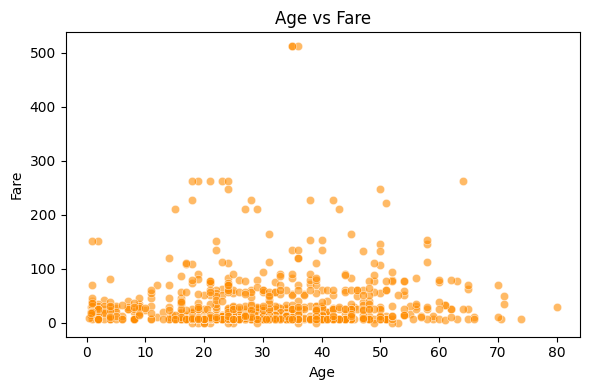

In [491]:
scatterplot(titanic_df, 'Age', 'Fare')

Nie widać wpływu wieku na cenę biletu.

/tmp/ipython-input-2015224039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_column, y='Age', palette='Set2')


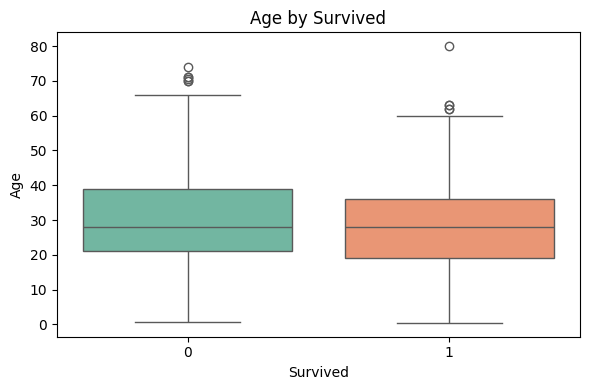

<Axes: xlabel='Survived', ylabel='Age'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


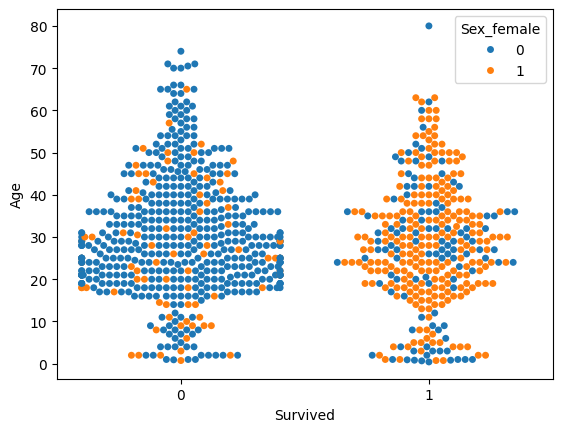

In [492]:
categorical_and_age(titanic_df, 'Survived')
sns.swarmplot(x='Survived', y='Age', data=titanic_df, hue='Sex_female')

Możemy zaobserwować, że mediana wieku dla osób, które przeżyły i nie jest dość podobna, jednak oba kwadryle wraz z maksimum znajdują się niżej, w przypadku osób, które przeżyły, co może sugerować, że wiek ma wpływ na przeżywalność (młodsze osoby -> większe szanse przeżycia)

/tmp/ipython-input-292972300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_column, y='Fare', palette='Set2')


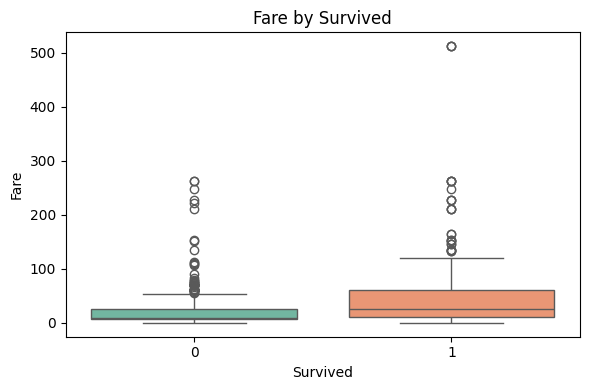

In [493]:
categorical_and_fare(titanic_df, 'Survived')

Możemy zaobserwować, że mediana ceny biletu dla osób, które przeżyły jest większa, podobnie jak oba kwadryle, maksimum i minimum, co wyraźnie pokazuje, że cena biletu ma znaczący wpływ na przeżywalność (droższy bilet -> większe szanse przeżycia)

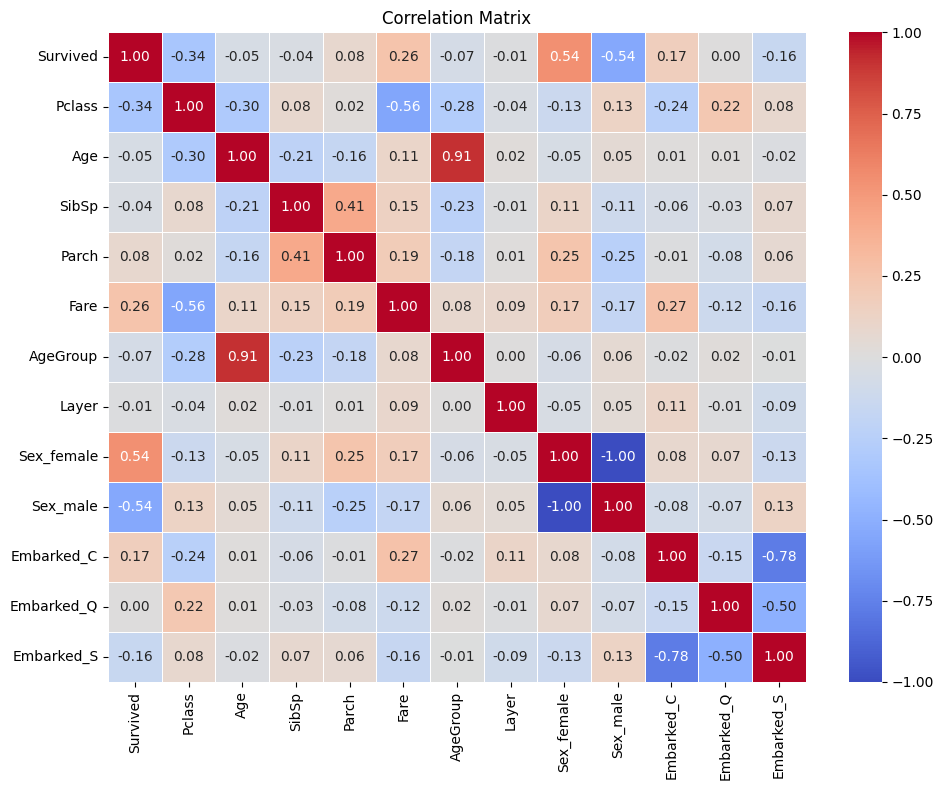

In [494]:
plot_correlation_matrix(titanic_df)

Z macierzy korelacji możemy zobaczyć, które zmienne są ze sobą powiązane, a szczególnie które wpływają na zmienna predykowaną Survived, czyli przyżycie pasażera Tytanica.

Widzimy bardzo silną dodatnią korelacje przeżywalności (Survived) dla kobiet (Sex_female). Również zauważalne, ale nie aż tak silna dodatnia korelacja przeżywalności występuje dla ceny biletu (Fare) (wyższa cena -> większa szansa na przyżycie) oraz dla osób wsiadających w Cherbourgu (Embarked_C). O ile ceny i płci się spodziewałem, to port, w którym wsiadał pasażer to odkrycie dość zaskakujące.

 Silną korelacje ujemną przeżywalności obserwujemy dla mężczyzn (Sex_male) oraz dla klasy podróży (Pclass) (wyższy numer klasy, czyli "gorsza klasa" -> mniejsza szansa na przeżycie). Możemy również zauważyć, że osoby odpływające z Southampton (Embarked_S) również miały zauważalnie mniejsze szanse przeżycia podobnie jak dzieci (AgeGroup) (Silnej jest to widoczne w AgeGroup niż Age).

 Zatem gratulujemy wszystkim młodym dziewczynom z I klasy wypływających z Cherbourgu, których rodzice słono zapłacili za bilety oraz najlepiej nie mają rodzeństwa, a ich kabina znajdowała się na niskim poziomie (?ciekawe?).

 Nie wiem gdzie można wyznaczyć granicę że dana kategoria przestaje mieć wpływ na drugą dlatego wszystkie wartośći poniżej 0.1 uznaje za mało znaczące na ten moment.

# Zadanie 2

Zacznę od usunięcia niepotrzebnych kolumn, w tym Layer, bo za dużo jest wartośći Unknown

In [495]:
titanic_df = titanic_df.drop(['Layer', 'Name', 'Ticket', 'Cabin'], axis=1)

In [496]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.25,1.0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1.0,1,0,1,0,0
3,1,3,26.0,0,0,7.925,1.0,1,0,0,0,1
4,1,1,35.0,1,0,53.1,1.0,1,0,0,0,1
5,0,3,35.0,0,0,8.05,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0,1.0,0,1,0,0,1
888,1,1,19.0,0,0,30.0,1.0,1,0,0,0,1
889,0,3,14.0,1,2,23.45,0.0,1,0,0,0,1


Wczytuje potrzebne biblioteki

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier

Dzielkę dane na treningowe (80%) i testowe (20%):

In [498]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived', axis=1), titanic_df['Survived'], train_size=.8, shuffle=True)

Sprawdzam jak z danymi będzie radził sobie Dummy Classifier:

In [499]:
model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.49      0.55       111
         1.0       0.39      0.54      0.46        68

    accuracy                           0.51       179
   macro avg       0.51      0.52      0.50       179
weighted avg       0.54      0.51      0.52       179

[[54 57]
 [31 37]]


Wyniki nie są zbyt dobre, f1-score, który bierze pod uwagę zarówno prezycje jak i czułość klasyfikacji jest dość niski dla obu wyników. Dokładność na poziomie 43% również nie jest zadowalająca. Patrząc na macierz 'confusion_matrix' widzimy, że mamy bardzo dużo źle zgadniętych wartości przeżycia osób tj. pola 0,1 i 1,0.

Zobaczmy jak poradzi sobie z klasyfikacją SVC:

In [500]:
from sklearn.svm import SVC
from sklearn.metrics import davies_bouldin_score

In [501]:
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.90      0.78       111
         1.0       0.67      0.32      0.44        68

    accuracy                           0.68       179
   macro avg       0.68      0.61      0.61       179
weighted avg       0.68      0.68      0.65       179

[[100  11]
 [ 46  22]]
DBI: 0.786837112230314


In [502]:
model = SVC(kernel='rbf', C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       111
         1.0       0.75      0.44      0.56        68

    accuracy                           0.73       179
   macro avg       0.74      0.68      0.68       179
weighted avg       0.74      0.73      0.71       179

[[101  10]
 [ 38  30]]
DBI: 0.9276135795339933


In [503]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       111
         1.0       0.73      0.71      0.72        68

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[93 18]
 [20 48]]
DBI: 4.031456447097755


Model SVC daje dużo lepsze wyniki niż Dummy Classifier, co pokazuje, że dobrze rozdzieliliśmy dane na etapie podziału na zbiory treningowy i testowy.

Użyta została metryka DBI, która przyjmuje małe wartości kiedy klastry są zwarte i oddzielone od siebie. Wydaje się ona sensowana, kiedy dzielimy dane na klastry.

Dwa hiperparametry zmieniane w tym modelu to:

*   kernel, czyli funkcja użytwa w modelu: Widzimy tutaj, że w przypadku 'rbf' klastry są bardziej zwarte i lepiej oddzielone (małe DBI), ale skutkuje to mniejszą dokładnością i większą ilością osób których los został źle przewidziany (confusion_matrix) niż dla funkcji 'linear', która poradziła sobie najlepiej. Również widać znaczący wzrost f1-score dla przeżycia i nie (0 i 1).
*   prametr C, który jest parametrem regulacji odpowiedzialnym w jakiś sposób za to jak bardzo 'gładki' jest fitting (mniejsze C, gładsze granice, mniejsze ryzyko overfittingu). Tutaj zwiększenie C powiększyło i przybliżyło do siebie klastry (DBI), ale jednocześnie poprawiło wyniki dokładności i zmniejszyła się liczba źle przewidzianych osób.

Sprawdzam co się stanie jak model odpale na danych treningowych:

In [504]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print('DBI:', davies_bouldin_score(X_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       438
         1.0       0.75      0.68      0.71       274

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.78      0.79      0.78       712

[[375  63]
 [ 89 185]]
DBI: 3.775183295026287


Uzyskany wynik jest lepszy jednak nie aż tak jak się spodziewałem, każdy z parametrów wyżej opisanych ulega lekkiej poprawie

In [505]:
from sklearn.inspection import DecisionBoundaryDisplay

W tym miejscu nieskutecznie próbowałem w jakiś sposób coś zwizualizować, jednak nie ogarnąłem jak mogę zwizualizować np. granice klastrów dla 2 cech, kiedy model uczy się na 11.

Spróbujmy z drzewem decyzyjnym:

In [506]:
from sklearn.tree import DecisionTreeClassifier

In [507]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       111
         1.0       0.88      0.56      0.68        68

    accuracy                           0.80       179
   macro avg       0.83      0.76      0.77       179
weighted avg       0.82      0.80      0.79       179

[[106   5]
 [ 30  38]]
DBI: 2.2782063502963297


In [508]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       111
         1.0       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

[[96 15]
 [18 50]]
DBI: 2.623815320711065


In [509]:
model = DecisionTreeClassifier(max_depth=5, criterion='log_loss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('DBI:', davies_bouldin_score(X_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       111
         1.0       0.84      0.63      0.72        68

    accuracy                           0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

[[103   8]
 [ 25  43]]
DBI: 1.9110231569773195


Model drzewa decyzyjnego radzi sobie delikatnie lepiej (być może kwaestia optymalizacji) niż SVC porównując liczbę niepoprawnych trafień (elementy macierzy 0,1 i 1,0), dokładność i f1-score.

Użyta została metryka DBI, która przyjmuje małe wartości kiedy klastry są zwarte i oddzielone od siebie. Wydaje się ona sensowana, kiedy dzielimy dane na klastry.

Dwa hiperparametry zmieniane w tym modelu to:

*   max_depth, czyli maksymalna głębokość drzewa. Zwiększenie niewielkie głębkości drzewa poskutkowało poprawionymi wynikami tj. bardziej zawężonymi klastrami oraz poprawioną dokładnością, ale obserwujemy też niewielki spadek f1-score.
*   criterion, czyli parametr mierzący jakość podziału w drzewie, czyli jak wybierane jest 'najlepsze pytanie' do podziału danych. Zmiana kryterium w bardzo mały sposób wpłynęła na wyniki tj. lekko zwiększył się parametr DBI oraz f1-score dla 0, ale ilość źle przewidzianego losu osób na Titanicu pozostała bez zmian.

Sprawdzam co się stanie jak model odpale na danych treningowych:

In [510]:
model = DecisionTreeClassifier(max_depth=5, criterion='log_loss')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print('DBI:', davies_bouldin_score(X_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       438
         1.0       0.83      0.72      0.77       274

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

[[397  41]
 [ 77 197]]
DBI: 1.903688715707896


Ponownie dostajemy lepsze wyniki, jednak nie jest to 100% skuteczności. Świadczyć to może o tym, że model nie jest przeuczony (dane treningowe wziąż mogą nie zostać zgadnięte) oraz możliwe jest że ich rozrzut jest na tyle duży, że ciężko odgadnąć nawet te dane na których odbywała się nauka (chyba).


Wnioski:

*   no to najlepiej poradził sobie model drzewa decyzyjnego, chociaż różnica nie była zbyt duża, a uzyskane wyniki były zbliżone
*   używanie danych treningowych do testowania poskutkowało lepszymi wynikami, chociaż nie 100% trafieniami ani nawet 90%
*   nie wiem jak wizualizować dane w 11 wymiarach :(
*   optymalizacja hiperparametrów była przeprowadzona raczej mało skrupultnie (mogłem zrobić pętle i faktycznie sprawdzić jak zachowują się te parametry, a zamiast tego sprawdziłem kilka razy i wrzuciłem tutaj 2 wybrane sytuacje dla danego hiperparametru. Trochę kwestia czasu niestety), ale myślę, że wciąż można powiedzieć że wybranie tych parametrów jest ważne i wpływa na efekt końcowy czasami mniej czasami bardziej zależy od parametru

